In [1]:
import pandas as pd
csvFileName  = 'C:\\Users\\sathy\\Desktop\\ATiML_Project\\master996.csv'
data = pd.read_csv ( open ( csvFileName ), delimiter=';',encoding= 'unicode_escape')

In [2]:
#Extracting the bookid into Dataframe column FileNo, book id pg10067- FileNo - 10067
data['FileNo'] = data['book_id'].str.replace(r'\D+', '').astype(int)

#Sorting the books based on FileNo
data.sort_values(by=['FileNo'], inplace=True)

In [3]:
import glob

# Getting all files and its names into dict and then converting to dataframe"""
Content = {}

#Its placed in Books folder at local , need to change it later 
%timeit
files = glob.glob("C:\\Users\\sathy\\Desktop\\ATiML_Project\\Gutenberg_English_Fiction_1k\\Books\\*.html")
for f in files:
    with open(f,mode ='r', encoding = 'utf8') as myfile:
        Content[f]=myfile.read().replace("<br>", '\n')

In [4]:
#Putting it in dataframe
df = pd.DataFrame.from_dict(Content,orient='index').reset_index()
#Renaming column names
df.columns = ['File_Name', 'Data']
#Adding FilNo column to join
df['FileNo'] = df['File_Name'].str.replace(r'\D+', '').astype(int)
df.sort_values(by=['FileNo'], inplace=True)

In [10]:
data['Book_Data'] = df.Data
data
books = pd.DataFrame({'data':data.Book_Data, 'genre':data.guten_genre})
books

,data,genre
961,<p>It was Carnival time in the ancient and onc...,Literary
962,<p>A king\n<p>Upon whose property...\n<p>A dam...,Literary
995,<p>Edition: 10\n<p>This eBook was produced by ...,Literary
958,<p>Her Fancy and His Fact\n<p>The old by-road ...,Literary
959,<p>A solitary room at midnight: a single wax c...,Detective and Mystery
...,...,...
863,"<p>issued June, 1907\n<p>Devota\n<p>Press of J...",Literary
864,"<p>""The light that never was on sea or land.""\...",Literary
865,<p>page 01b In the heart of a very maze of cou...,Literary
964,<p>A king\n<p>Upon whose property...\n<p>A dam...,Sea and Adventure


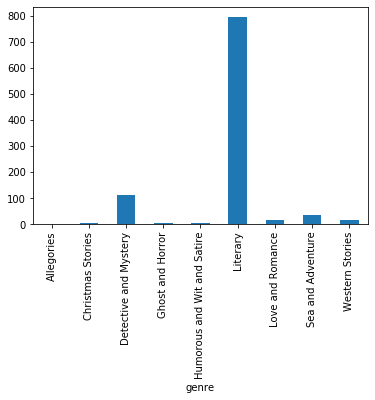

<Figure size 432x288 with 0 Axes>

In [11]:
# This is to see number of books per authors, but so many authors hence useless
#ax = sns.barplot(x = books['Author_Name'], y = books['FileNo'])

#Plotting number of authors per gerne
import matplotlib.pyplot as plt
books.groupby('genre')['data'].count().plot(kind = 'bar')
plt.show()
plt.clf()


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X = count_vect.fit_transform(books.data)

y= books['genre']

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3) 

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=2, k_neighbors=1)
X_train, y_train = smote.fit_resample(X_train,y_train)

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

c_score = clf.fit(X_train, y_train).score(X_test,y_test) 
print("Score before any preprocessing is :"+str(c_score))

#show the confusin matrix
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred)) 
cm = confusion_matrix(y_test, y_pred) 
print(cm)

KeyboardInterrupt: 

In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X = count_vect.fit_transform(books.data)

y= books['genre']

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3) 

from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

c_score = clf.fit(X_train, y_train).score(X_test,y_test) 
print("Score before any preprocessing is :"+str(c_score))

#show the confusin matrix
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred)) 
cm = confusion_matrix(y_test, y_pred) 
print(cm)

In [10]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X = count_vect.fit_transform(books.data)

y= books['genre']

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3) 

from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

from sklearn.svm import LinearSVC
clf =  LinearSVC()

c_score = clf.fit(X_train, y_train).score(X_test,y_test) 
print("Score before any preprocessing is :"+str(c_score))

#show the confusin matrix
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred)) 
cm = confusion_matrix(y_test, y_pred) 
print(cm)

Score before any preprocessing is :0.7090301003344481
                             precision    recall  f1-score   support

          Christmas Stories       0.00      0.00      0.00         0
      Detective and Mystery       0.11      0.07      0.08        30
Humorous and Wit and Satire       0.00      0.00      0.00         2
                   Literary       0.81      0.85      0.83       246
           Love and Romance       0.00      0.00      0.00         3
          Sea and Adventure       0.00      0.00      0.00        12
            Western Stories       0.00      0.00      0.00         6

                   accuracy                           0.71       299
                  macro avg       0.13      0.13      0.13       299
               weighted avg       0.68      0.71      0.69       299

[[  0   0   0   0   0   0   0]
 [  0   2   0  27   0   0   1]
 [  0   0   0   2   0   0   0]
 [  1  16   1 210   1  10   7]
 [  0   0   0   3   0   0   0]
 [  0   0   0  12   0   0   0

C:\Users\sathy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\sathy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
